In [1]:
import pandas as pd
import numpy as np
import re

import time

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import Imputer
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/Andrew/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Andrew/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/Andrew/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Andrew/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <mo

In [2]:
df = pd.read_csv('../Home-Credit-Data/clean_train_data (1).csv')
df2 = pd.read_csv('../Home-Credit-Data/clean_test_data (1).csv')

In [3]:
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [4]:
df2.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
2,2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,...,1,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
3,3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
4,4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,...,0,0,0,0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769


In [5]:
df.shape, df2.shape

((307511, 60), (48744, 59))

In [6]:
df.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIA

In [16]:
# Use pandas profiling to find some correlations
pandas_profiling.ProfileReport(df)

Number of variables,60
Number of observations,307511
Total Missing (%),0.0%
Total size in memory,140.8 MiB
Average record size in memory,480.0 B
Numeric,25
Categorical,12
Boolean,22
Date,0
Text (Unique),0
Rejected,1


In [7]:
df.dtypes

Unnamed: 0                       int64
SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [7]:
dep = df['TARGET']
indep = df.drop(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                 'ORGANIZATION_TYPE'], axis=1)

In [22]:
indep.corr()

,const,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 0,NaN,1.000000,0.999999,-0.001129,-0.001819,-0.000343,-0.000435,0.000848,-0.001502,0.001365,...,0.001808,0.001502,-0.002014,0.000513,-2.484937e-03,-2.040550e-03,1.951633e-03,4.553201e-04,9.559548e-04,4.340260e-03
SK_ID_CURR,NaN,0.999999,1.000000,-0.001129,-0.001820,-0.000343,-0.000433,0.000849,-0.001500,0.001366,...,0.001809,0.001505,-0.002012,0.000509,-2.486236e-03,-2.040093e-03,1.952612e-03,4.516280e-04,9.535961e-04,4.334531e-03
CNT_CHILDREN,NaN,-0.001129,-0.001129,1.000000,0.012882,0.002145,0.021374,-0.025573,0.330938,-0.239818,...,0.051697,-0.001997,-0.005318,0.004031,-3.827907e-04,-3.417239e-04,-2.276822e-03,-1.010140e-02,-7.323678e-03,-3.883426e-02
AMT_INCOME_TOTAL,NaN,-0.001819,-0.001820,0.012882,1.000000,0.156870,0.191657,0.074796,0.027261,-0.064223,...,0.072451,0.018389,0.002315,0.003130,6.909242e-04,2.868087e-03,2.325737e-03,2.406300e-02,4.734061e-03,1.138830e-02
AMT_CREDIT,NaN,-0.000343,-0.000343,0.002145,0.156870,1.000000,0.770127,0.099738,-0.055436,-0.066838,...,0.082819,0.022602,0.028986,0.034329,-3.653596e-03,3.963947e-03,-1.192458e-03,5.093388e-02,1.489646e-02,-4.531801e-02
AMT_ANNUITY,NaN,-0.000435,-0.000433,0.021374,0.191657,0.770127,1.000000,0.118424,0.009445,-0.104331,...,0.130579,0.033691,-0.003668,-0.009745,3.565420e-03,2.017909e-03,1.281519e-02,3.614812e-02,9.347827e-03,-1.045214e-02
REGION_POPULATION_RELATIVE,NaN,0.000848,0.000849,-0.025573,0.074796,0.099738,0.118424,1.000000,-0.029582,-0.003980,...,0.088523,0.038434,0.024632,0.013367,-2.056316e-03,1.293267e-03,-1.985970e-03,7.265528e-02,-1.182627e-03,9.273629e-04
DAYS_BIRTH,NaN,-0.001502,-0.001500,0.330938,0.027261,-0.055436,0.009445,-0.029582,1.000000,-0.615864,...,0.113243,0.018213,0.044716,0.044498,4.853826e-03,2.070789e-03,-1.226661e-03,1.259729e-03,-1.083634e-02,-6.610713e-02
DAYS_EMPLOYED,NaN,0.001365,0.001366,-0.239818,-0.064223,-0.066838,-0.104331,-0.003980,-0.615864,1.000000,...,-0.121571,-0.023834,-0.028915,-0.040396,-4.398166e-03,4.387547e-04,2.853353e-03,-3.200336e-02,1.425209e-02,4.642863e-02


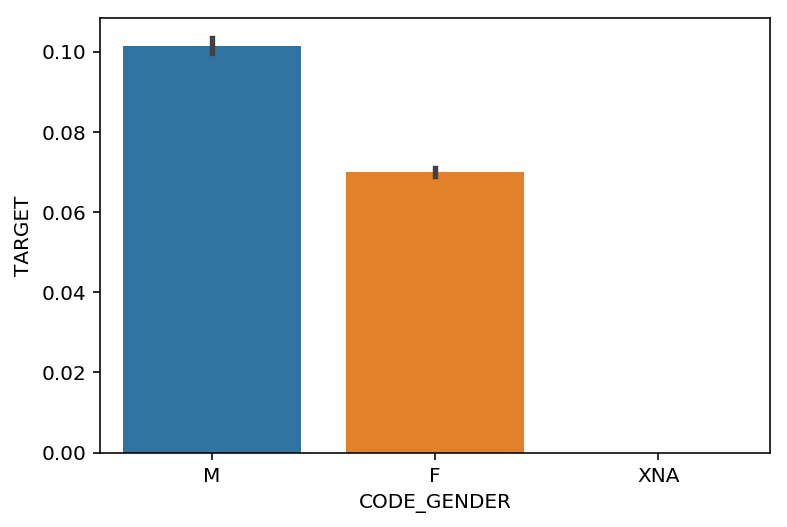

In [18]:
sns.barplot(x="CODE_GENDER", y='TARGET', data=df)

In [26]:
# Target percentages
df.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Only 8.07 percent of people pay back their loans. 

In [22]:
# See which loans are given out
pd.crosstab(df.TARGET, df.NAME_CONTRACT_TYPE, dropna=False, normalize='all')

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,0.829274,0.089997
1,0.075513,0.005216


Only 7.55 percent of people with Cash Loans pay back their loans and less than 1 percent of people with Revolving Loans pay back their loan. 

In [24]:
# Explore difference in Gender
pd.crosstab(df.TARGET, df.CODE_GENDER, dropna=False)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


More women take loans then men and men pay back their loans at a higher percentage. 4 people with unidentified gender didn't repay their loans.  

In [25]:
# Find mean, median of the income of each career and count total number
df.groupby(['NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                                 mean    median   count
NAME_INCOME_TYPE                                       
Businessman             652500.000000  495000.0      10
Commercial associate    202955.327289  180000.0   71617
Maternity leave         140400.000000   90000.0       5
Pensioner               136401.292273  117000.0   55362
State servant           179737.969506  157500.0   21703
Student                 170500.000000  157500.0      18
Unemployed              110536.363636   78750.0      22
Working                 163169.889223  135000.0  158774

In [27]:
# Explore types of marriages and number of children. 
pd.crosstab(df.CNT_CHILDREN, df.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
CNT_CHILDREN,,,,,,
0,20947,126575,14132,38810,2,14905
1,6588,43696,4389,5578,0,868
2,1936,22496,1111,958,0,248
3,262,3190,122,85,0,58
4,33,370,12,9,0,5
5,5,74,2,1,0,2
6,2,17,1,0,0,1
7,1,5,0,0,0,1
8,0,2,0,0,0,0


In [28]:
pd.crosstab(df.TARGET, df.CNT_CHILDREN, dropna=False)

CNT_CHILDREN,0,1,2,3,4,5,6,7,8,9,10,11,12,14,19
TARGET,,,,,,,,,,,,,,,
0,198762,55665,24416,3359,374,77,15,7,2,0,2,0,2,3,2
1,16609,5454,2333,358,55,7,6,0,0,2,0,1,0,0,0
